In [3]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt


In [40]:
def adjust_r_one_step(p, r):
    r = r[:, None] 
    p = p[None, :]
    return (1 + r) / (1 - p) - 1


def adjust_r(p, r):
    r = r[:, None] 
    p = p[None, :]
    return r * p /((1 + r) * (1 - p))


def plot_adjust_r(p_values, r_values):
    # Calculate data
    adjusted_r_values = adjust_r(p_values, r_values)
    adjusted_r_values_one_step = adjust_r_one_step(p_values, r_values)
    
    # Find masks of different interesting areas    
    mask = adjusted_r_values > r_values[:, None]  # Area where adjusted r is greater than r
    mask_assumption_wrong = (1 - p_values[None, :]) * (1 + r_values[:, None]) > 1

    # Create fig and unpack axis
    fig, ax_arr = plt.subplots(ncols=2, nrows=2, figsize=(16, 12))
    ax = ax_arr[0, 0]
    ax1 = ax_arr[0, 1]
    ax2 = ax_arr[1, 0]
    ax3 = ax_arr[1, 1]
    
    # Axis 0 - Adjusted r
    im = ax.contourf(p_values, r_values, adjusted_r_values, levels=30, cmap="viridis")
    # Add magnitude labels to the contour plot
    contours = ax.contour(p_values, r_values, adjusted_r_values, levels=30, cmap="binary", linewidths=0.5)
    ax.clabel(contours, inline=True, fontsize=8, fmt="%.2f")
    
    # Masks
    ax.contour(p_values, r_values, mask, levels=[0.5], colors='blue', linestyles='-', linewidths=3)  # Mask for r_D > r
    ax.contourf(p_values, r_values, np.logical_not(mask_assumption_wrong), levels=[0, 0.1], colors='red')  # Mask for r_D > r. logical_not to get the colours right, otherwise makes the correct area red.
    
    # Axis setup
    ax.set_ylabel(r"Free interest $r_f$")
    ax.set_title(r"Adjusted interest $r$")
    
    # Custom legend for the contour plot of the mask
    custom_lines = [Line2D([0], [0], color='blue', linestyle='-', lw=2, label="r > r_f (right of line)"), 
                    Line2D([0], [0], color='red', linestyle='-', lw=2, label="Assumption wrong")]
    ax.legend(handles=custom_lines, loc="upper left")
    
    # Axis 1 - Percentage difference
    percent_diff = (adjusted_r_values - r_values[:, None]) / r_values[:, None] * 100
    
    im2 = ax1.contourf(p_values, r_values, percent_diff, levels=30, cmap="viridis")  # Contour fill
    contours2 = ax1.contour(p_values, r_values, percent_diff, levels=30, cmap="binary", linewidths=0.5)  # Contour lines
    ax1.contourf(p_values, r_values, np.logical_not(mask_assumption_wrong), levels=[0, 0.1], colors='red')  # Mask for r_D > r. logical_not to get the colours right, otherwise makes the correct area red.
    
    ax1.clabel(contours2, inline=True, fontsize=8, fmt="%.2f")
    # Axis 1 setup
    ax1.set_title(r"Percentage difference in $r$ and $r_f$")
    # Custom legend for the contour plot of the mask
    custom_lines_ax1 = [Line2D([0], [0], color='red', linestyle='-', lw=2, label="Assumption wrong")]
    ax1.legend(handles=custom_lines_ax1, loc="upper left")
    
    # Axis 2 - Adjusted r one step
    # Plot 
    im3 = ax2.contourf(p_values, r_values, adjusted_r_values_one_step, levels=30, cmap="viridis")
    contours3 = ax2.contour(p_values, r_values, adjusted_r_values_one_step, levels=30, cmap="binary", linewidths=0.5)
    ax2.clabel(contours3, inline=True, fontsize=8, fmt="%.2f")
    # Axis setup
    ax2.set(xlabel="Probability of default $P_D$", ylabel="Free interest $r_f$", title="Adjusted interest $r$ one step")
    
    # Axis 3 - Percentage difference one step
    percent_diff_one_step = (adjusted_r_values_one_step - r_values[:, None]) / r_values[:, None] * 100
    im4 = ax3.contourf(p_values, r_values, percent_diff_one_step, levels=60, cmap="viridis")
    contours4 = ax3.contour(p_values, r_values, percent_diff_one_step, levels=60, cmap="binary", linewidths=0.5)
    ax3.clabel(contours4, inline=True, fontsize=8, fmt="%.2f")
    # Axis setup
    ax3.set(xlabel="Probability of default $P_D$", title="Percentage difference in $r$ and $r_f$ one step")
    
    # Figure title and colorbars
    fig.colorbar(im, ax=ax, label=r"$r_D$")
    fig.colorbar(im2, ax=ax1, label="Percentage difference")
    fig.colorbar(im3, ax=ax2, label=r"$r_D$")
    fig.colorbar(im4, ax=ax3, label="Percentage difference")
    
    fig.suptitle(r"$r = r_f \, P_D / \left[(1+r_f)(1-P_D)\right]$ vs $r = (1 + r_f) / (1 - P_D) - 1$", fontsize=12)
    plt.show()

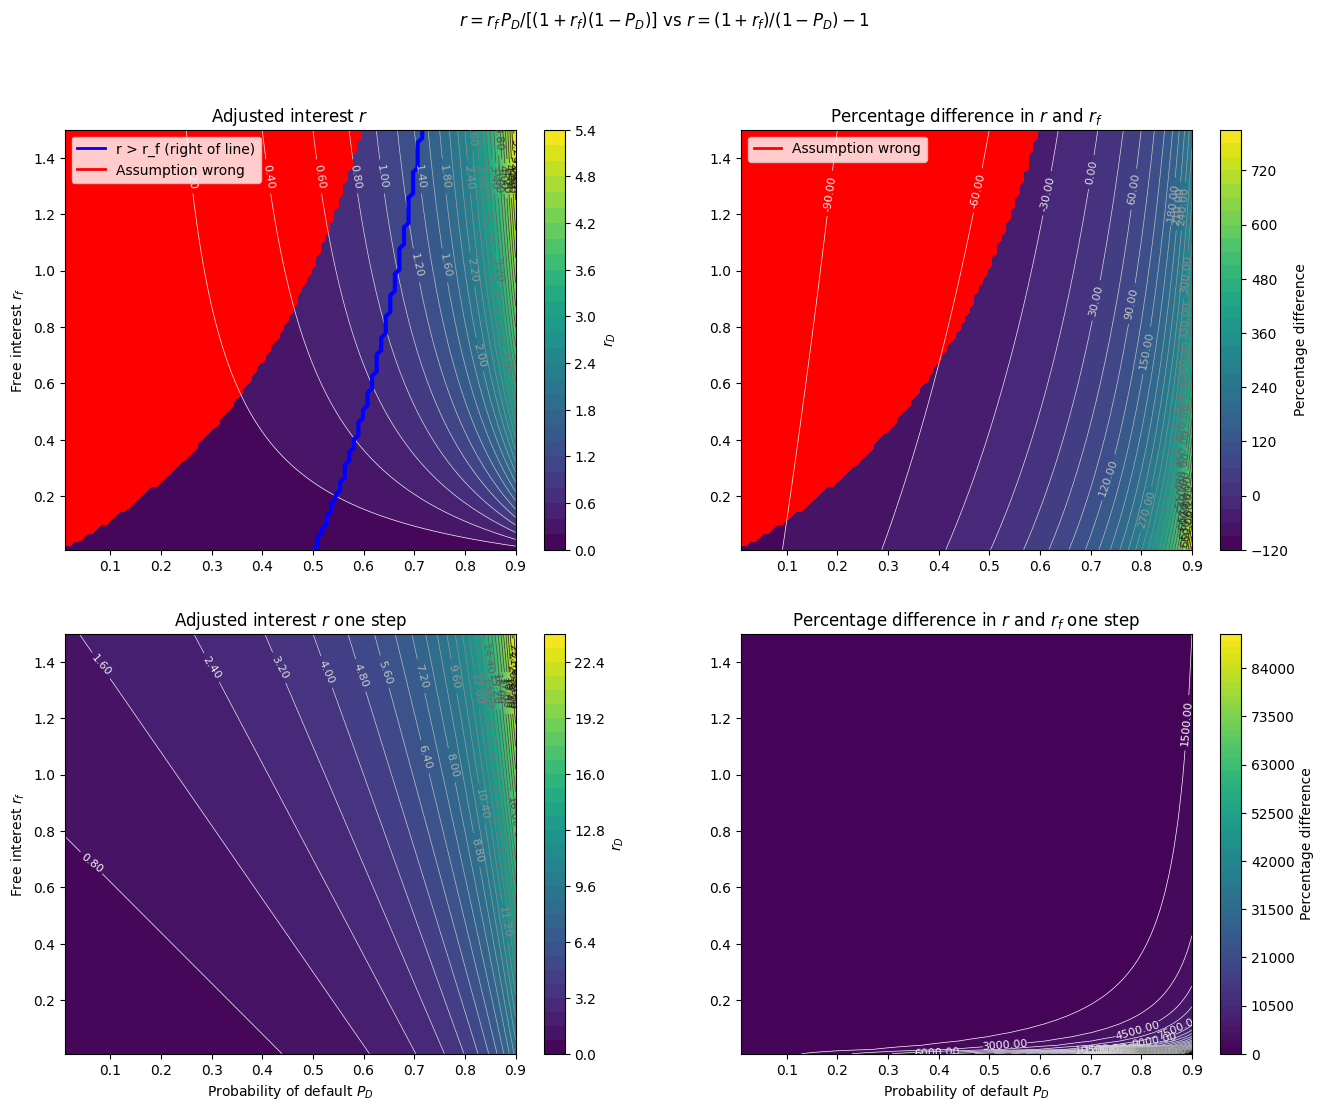

In [42]:
p = np.linspace(0.01, 0.9, 100)
r = np.linspace(0.01, 1.5, 100)  
plot_adjust_r(p, r)

Note that in the one step formula, $r$ is always greater than $r_f$